In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def show_values_on_bars(axs, h_v="v", space=1):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

#  `Netflix - Data Exploration and Visualisation`

## `insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries`

In [3]:
df = pd.read_csv("C:/Users/srinj/Downloads/Business Case Netflix - Data Exploration and Visualisation/netflix.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


## base info about the data set: 

#### getting idea about the shape / data type info 

#### if there are missing data in columns 

In [6]:
df.shape

(8807, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(1), object(11)
memory usage: 825.7+ KB


##### missing values per column in %:


In [8]:

(df.isna().sum()/len(df))*100 # % 

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
# director column has 29% missing value
# for cast and countries 10% missing data

In [10]:
df["show_id"].duplicated().value_counts()

False    8807
Name: show_id, dtype: int64

###### no duplicate data

In [11]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s3999,Movie,Trailer Park Boys: Xmas Special,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [12]:
df.isna().sum().sum()  # total missing values in the data set

4307

##### replacing necessary null values 


In [13]:
df["director"].fillna(value="Unknown", inplace=True)
df["cast"].fillna(value="Unknown", inplace=True)
df["country"].fillna(value="Unknown",inplace=True)

In [14]:
df.describe(include="object")

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,8807,8807,8807,8797,8803,8804,8807,8807
unique,8807,2,8807,4529,7693,749,1767,17,220,514,8775
top,s3999,Movie,Trailer Park Boys: Xmas Special,Unknown,Unknown,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,1793,362,4


##### unique values per column: 

In [15]:
df.nunique()

show_id         8807
type               2
title           8807
director        4529
cast            7693
country          749
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

##### # converting data type of date_added to datetime format


In [16]:

df["date_added"] = pd.to_datetime(df["date_added"])

In [17]:
df.head().head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


###### dropping unnecessary columns 

In [18]:
df.drop(["show_id","description"], axis=1 , inplace= True)

In [19]:
df.head(1)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries


##### extracting necessary freatures from already present data : 
##### adding year and month data when content was added 

In [20]:
df["year_added"] = df["date_added"].dt.year

In [21]:
df["month_added"]  = df["date_added"].dt.month_name()

#### seperating duration for TV shows and Movies and changing their data types 


In [22]:
df["Movie_duration"] = df["duration"].loc[df["type"]=="Movie"]
df["Series_duration"] = df["duration"].loc[df["type"]=="TV Show"]

In [23]:
### changing data type and format of Mpvies_duratio to float
def split_duration(x):
    return str(x).split(" ")[0]


In [24]:
df["Movie_duration"] = df["Movie_duration"].apply(split_duration).astype("float")
df["Series_duration"] = df["Series_duration"].apply(split_duration).astype("float")

In [25]:
df.drop("duration",axis =1,inplace=True)

In [26]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,month_added,Movie_duration,Series_duration
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September,90.0,NaN
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September,NaN,2.0
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021.0,September,NaN,1.0


### `type of content on Netflix dataset`

In [27]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [28]:
df["type"].value_counts(dropna=False)

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [29]:
moviesVSseries = df["type"].value_counts(normalize=True)*100
moviesVSseries

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [30]:
sns.set(font_scale = 1)

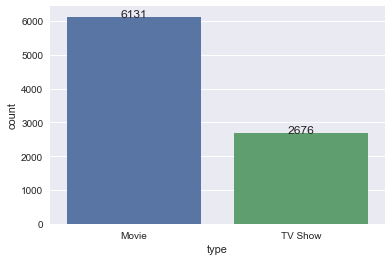

In [31]:
types = sns.countplot(data = df , x = "type")


        
show_values_on_bars(types,h_v="v",space=1)        

### `Number of content per Rating`

In [32]:
df["Content_For"] = df["rating"].replace({"TV-MA":"Adults",
                     "TV-14" : "Teens",
                     "TV-PG" : "Older Kids",
                      "R":"Adults",
                      "PG-13":"Teens",
                      "TV-Y7":"Older Kids",
                      "TV-Y":"Kids",
                      "PG":"Older Kids",
                      "TV-G":"Kids",
                      "NR":"Adults",
                      "G":"Kids",
                      "TV-Y7-FV":"Older Kids",
                      "NC-17":"Adults",
                      "UR":"Adults"
                     
                    
                     })

In [33]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'listed_in', 'year_added', 'month_added',
       'Movie_duration', 'Series_duration', 'Content_For'],
      dtype='object')

##### number of Content each rating category has : 

In [34]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

In [35]:
(df["rating"].value_counts(normalize=True)*100).head(11)



TV-MA    36.430762
TV-14    24.537090
TV-PG     9.803476
R         9.076451
PG-13     5.566284
TV-Y7     3.794161
TV-Y      3.487447
PG        3.260252
TV-G      2.499148
NR        0.908781
G         0.465750
Name: rating, dtype: float64

In [36]:
(df["rating"].value_counts(normalize=True)*100).head(11).sum()

# 99.82% of content is from above rating list 


99.82960354424627

##### 99.82% of content is from above rating list 

In [37]:
most_frequent_ratings =  df["rating"].value_counts().sort_values(ascending=False).head(11).index
most_frequent_ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G'],
      dtype='object')

In [38]:
ratings = df["rating"].value_counts().sort_values(ascending=False).head(11)

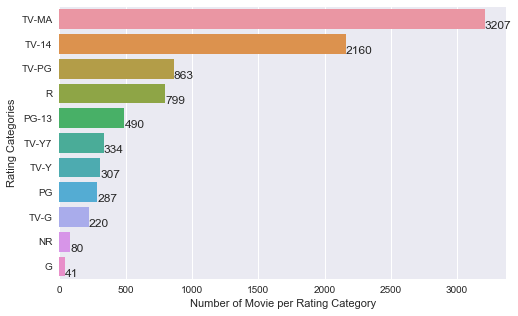

In [39]:
plt.figure(figsize=(8,5))
# sns.barplot(x=df["rating"].value_counts().head(11),y = df["rating"].value_counts().head(11).index)
show_values_on_bars(sns.barplot( x = df["rating"].value_counts().head(11),
                                y = df["rating"].value_counts().head(11).index)
                    ,h_v="h")
plt.xlabel("Number of Movie per Rating Category")
plt.ylabel("Rating Categories")
plt.show()

##### Number of Contents present in data as per Age group : 

In [40]:
df["Content_For"].value_counts().head()

Adults        4092
Teens         2650
Older Kids    1490
Kids           568
74 min           1
Name: Content_For, dtype: int64

In [41]:
df["Content_For"].value_counts(normalize=True)*100

Adults        46.484153
Teens         30.103374
Older Kids    16.926048
Kids           6.452346
74 min         0.011360
66 min         0.011360
84 min         0.011360
Name: Content_For, dtype: float64

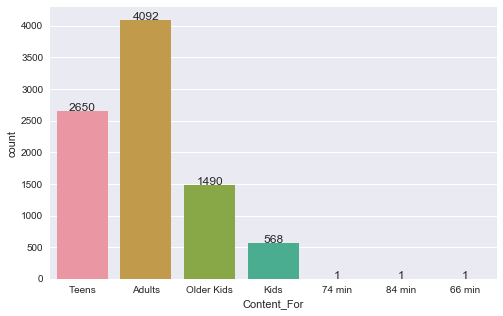

In [42]:
plt.figure(figsize=(8,5))
show_values_on_bars(sns.countplot(x = df["Content_For"]))

### `# number of movies released per year over last 30 years`

In [43]:
in_last_30_year_movie_released =  df.groupby("release_year")["title"].count().sort_values(ascending=True).tail(30).reset_index()

In [44]:
in_last_30_year_movie_released.columns

Index(['release_year', 'title'], dtype='object')

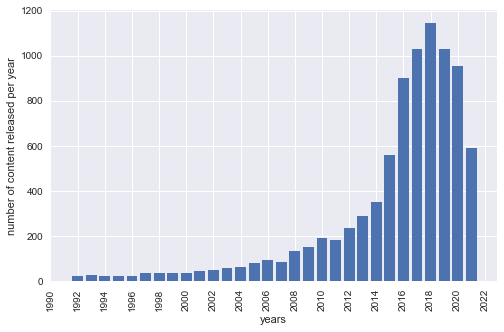

In [45]:
plt.figure(figsize=(8,5))
plt.bar(in_last_30_year_movie_released["release_year"],in_last_30_year_movie_released["title"])

plt.xlabel("years")
plt.ylabel("number of content released per year")

# plt.xticks(20)
plt.xticks(np.arange(1990,2023,2),rotation = 90)


plt.show()


#### Recommendation : 
 It would be appropriate decision if we add content based on past data as per best actors and directors , or produce more movies specifically for Netflix . 

# Data Preprocessing  

### working on multi_value data columns

In [46]:
# cast - director - country - listedIn(genres)

In [47]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,year_added,month_added,Movie_duration,Series_duration,Content_For
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,2021.0,September,90.0,NaN,Teens
1,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2021.0,September,NaN,2.0,Adults
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021.0,September,NaN,1.0,Adults


#### unnesting columns 

In [48]:
casts = df["cast"].apply(lambda x:str(x).split(", ")).tolist()
casts = pd.DataFrame(casts,index=df["title"])
casts = casts.stack()
casts = pd.DataFrame(casts).reset_index()
casts = casts[["title",0]]
casts.columns = ["title","cast"]

directors = df["director"].apply(lambda x:str(x).split(", ")).tolist()
directors = pd.DataFrame(directors,index=df["title"])
directors = directors.stack()
directors = pd.DataFrame(directors).reset_index()
directors = directors[["title",0]]
directors.columns = ["title","directors"]

countries = df["country"].apply(lambda x:str(x).split(", ")).tolist()
countries = pd.DataFrame(countries,index=df["title"])
countries = countries.stack()
countries = pd.DataFrame(countries).reset_index()
countries = countries[["title",0]]
countries.columns = ["title","countries"]

genres = df["listed_in"].apply(lambda x:str(x).split(", ")).tolist()
genres = pd.DataFrame(genres,index=df["title"])
genres = genres.stack()
genres = pd.DataFrame(genres).reset_index()
genres = genres[["title",0]]
genres.columns = ["title","genres"]

#### Merging unnested data with original data frame : 

In [49]:
data = pd.merge(pd.merge(pd.merge(pd.merge(casts,directors,on="title"),countries,on="title"),genres,on="title"),df,on="title")

In [50]:
data.columns

Index(['title', 'cast_x', 'directors', 'countries', 'genres', 'type',
       'director', 'cast_y', 'country', 'date_added', 'release_year', 'rating',
       'listed_in', 'year_added', 'month_added', 'Movie_duration',
       'Series_duration', 'Content_For'],
      dtype='object')

In [51]:
data.duplicated().value_counts()

False    201936
True         55
dtype: int64

In [52]:
201936+55

201991

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 18 columns):
title              201991 non-null object
cast_x             201991 non-null object
directors          201991 non-null object
countries          201991 non-null object
genres             201991 non-null object
type               201991 non-null object
director           201991 non-null object
cast_y             201991 non-null object
country            201991 non-null object
date_added         201833 non-null datetime64[ns]
release_year       201991 non-null int64
rating             201924 non-null object
listed_in          201991 non-null object
year_added         201833 non-null float64
month_added        201833 non-null object
Movie_duration     145840 non-null float64
Series_duration    56148 non-null float64
Content_For        201924 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(13)
memory usage: 29.3+ MB


In [54]:
data.shape

(201991, 18)

##### dropping unncessary old nested data  

In [55]:
data.drop(["cast_y","director","country","listed_in"],axis = 1,inplace=True)

In [56]:
data.rename({"cast_x":"actors"},axis = 1,inplace=True)

In [57]:
data.head(5)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,2021.0,September,90.0,NaN,Teens
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
2,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
3,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
4,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults


In [58]:
data.shape

(201991, 14)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 14 columns):
title              201991 non-null object
actors             201991 non-null object
directors          201991 non-null object
countries          201991 non-null object
genres             201991 non-null object
type               201991 non-null object
date_added         201833 non-null datetime64[ns]
release_year       201991 non-null int64
rating             201924 non-null object
year_added         201833 non-null float64
month_added        201833 non-null object
Movie_duration     145840 non-null float64
Series_duration    56148 non-null float64
Content_For        201924 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 23.1+ MB


## Analysing Genres  { Content which are listed in: }

In [60]:
totalcontent_in_all_genres = data.groupby("genres")["title"].nunique().sum()

In [61]:
totalcontent_in_all_genres

19323

In [62]:
((data.groupby("genres")["title"].nunique().sort_values(ascending=False)/totalcontent_in_all_genres)*100).head(23).sum()

91.06763960047611

In [63]:
genres_wise_distribution = ((data.groupby("genres")["title"].nunique().sort_values(ascending=False)/totalcontent_in_all_genres)*100)
genres_wise_distribution


genres
International Movies            14.242095
Dramas                          12.560161
Comedies                         8.663251
International TV Shows           6.991668
Documentaries                    4.497231
Action & Adventure               4.445479
TV Dramas                        3.948662
Independent Movies               3.912436
Children & Family Movies         3.317290
Romantic Movies                  3.187911
TV Comedies                      3.006779
Thrillers                        2.986079
Crime TV Shows                   2.432335
Kids' TV                         2.334006
Docuseries                       2.044196
Music & Musicals                 1.940692
Romantic TV Shows                1.914817
Horror Movies                    1.847539
Stand-Up Comedy                  1.775087
Reality TV                       1.319671
British TV Shows                 1.309320
Sci-Fi & Fantasy                 1.257569
Sports Movies                    1.133364
Anime Series               

##### Total 25 different Genres with their Movie Counts :



In [64]:
data.groupby("genres")["title"].nunique().sort_values(ascending=False).head(25).reset_index()

,genres,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


##### Genre distribution across the world : 

In [65]:
genredist  = data.groupby("genres")["title"].nunique().sort_values(ascending=False).head(25).reset_index()

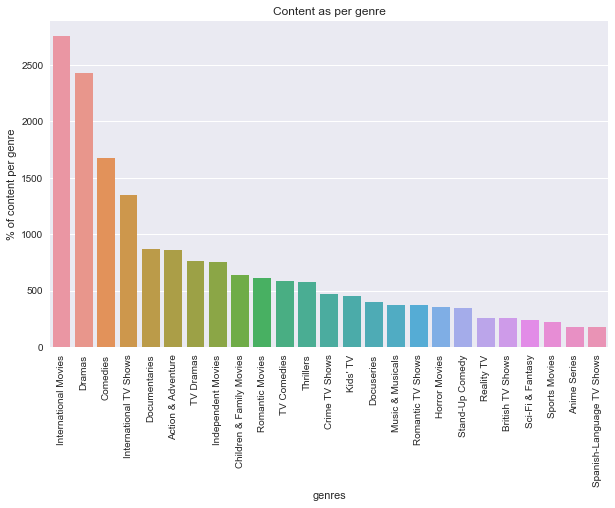

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x = "genres" , y="title" , data = genredist )
plt.title("Content as per genre")
plt.xlabel("genres")
plt.ylabel("% of content per genre")
plt.xticks(rotation = 90)
plt.show()

##### most popular genres on netflix are:

In [67]:
most_popular_genres = genres_wise_distribution.head(20).index
most_popular_genres

Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'Action & Adventure', 'TV Dramas',
       'Independent Movies', 'Children & Family Movies', 'Romantic Movies',
       'TV Comedies', 'Thrillers', 'Crime TV Shows', 'Kids' TV', 'Docuseries',
       'Music & Musicals', 'Romantic TV Shows', 'Horror Movies',
       'Stand-Up Comedy', 'Reality TV'],
      dtype='object', name='genres')

# `GLOBAL INSIGHTS `

In [68]:
data.head()

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,2021.0,September,90.0,NaN,Teens
1,Blood & Water,Ama Qamata,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
2,Blood & Water,Ama Qamata,Unknown,South Africa,TV Dramas,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
3,Blood & Water,Ama Qamata,Unknown,South Africa,TV Mysteries,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
4,Blood & Water,Khosi Ngema,Unknown,South Africa,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults


## Most Frequent Actors from the dataset : 

#### top 50 actors : their maximum number of content they have worked on and countires they have worked in .

In [69]:
data.groupby("actors")[["title","countries"]].aggregate({"title":"nunique",
                                                        "countries":"nunique"}).sort_values(by="title",ascending=False).head(50)


,title,countries
actors,,
Unknown,825,65
Anupam Kher,43,5
Shah Rukh Khan,35,5
Julie Tejwani,33,2
Naseeruddin Shah,32,4
Takahiro Sakurai,32,2
Rupa Bhimani,31,2
Om Puri,30,6
Akshay Kumar,30,2


#### top 20 directors  : their number of content and the counties they have worked in . 

In [70]:
data.groupby("directors")[["title","countries"]].aggregate({"title":"nunique",
                                                        "countries":"nunique"}).sort_values(by="title",ascending=False).head(20)


,title,countries
directors,,
Unknown,2634,67
Rajiv Chilaka,22,2
Jan Suter,21,4
Raúl Campos,19,4
Marcus Raboy,16,2
Suhas Kadav,16,2
Jay Karas,15,1
Cathy Garcia-Molina,13,1
Jay Chapman,12,1


## number of Content per Country on Netflix

In [71]:
# df["country"].value_counts(dropna=False).head(20)

movies_per_country  = data.groupby("countries")["title"].nunique().sort_values(ascending=False).head(20)
movies_per_country

countries
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Name: title, dtype: int64

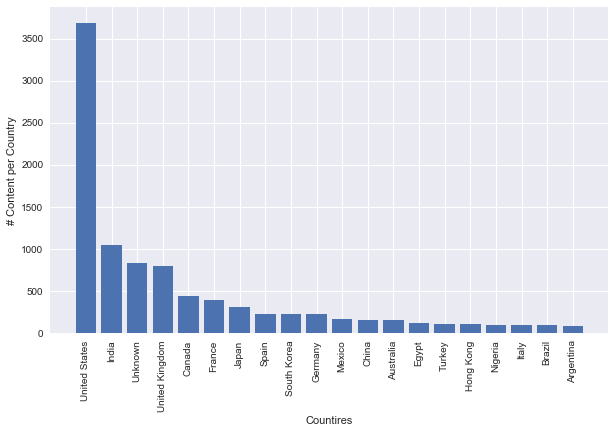

In [72]:
plt.figure(figsize=(10,6))
plt.bar(movies_per_country.index,height=movies_per_country)

plt.xlabel("Countires")
plt.ylabel("# Content per Country")

# plt.xticks(20)
plt.xticks(rotation = 90)


plt.show()

In [73]:
(data.groupby("countries")["title"].nunique().sort_values(ascending=False).head(20).sum()/10845)*100

86.97095435684648

87 % of the Contents is from above 20 Countries.

In [74]:
# business in top 10 countires
top_20_countires = movies_per_country.index

In [75]:
top_20_countires

Index(['United States', 'India', 'Unknown', 'United Kingdom', 'Canada',
       'France', 'Japan', 'Spain', 'South Korea', 'Germany', 'Mexico', 'China',
       'Australia', 'Egypt', 'Turkey', 'Hong Kong', 'Nigeria', 'Italy',
       'Brazil', 'Argentina'],
      dtype='object', name='countries')

### # Number of content added per year


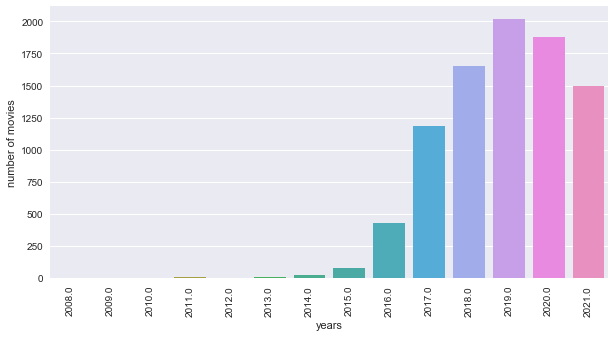

In [76]:
# mvies added per year

plt.figure(figsize=(10,5))
sns.barplot(y = data.groupby(data["date_added"].dt.year)["title"].nunique().sort_values(ascending=False),
            x =data.groupby(data["date_added"].dt.year)["title"].nunique().sort_values(ascending=False).index )
plt.xticks(rotation = 90)
plt.xlabel("years")
plt.ylabel("number of movies")
plt.show()

### top actors per perticular genre :(Internationally)

In [77]:
most_popular_genres 


Index(['International Movies', 'Dramas', 'Comedies', 'International TV Shows',
       'Documentaries', 'Action & Adventure', 'TV Dramas',
       'Independent Movies', 'Children & Family Movies', 'Romantic Movies',
       'TV Comedies', 'Thrillers', 'Crime TV Shows', 'Kids' TV', 'Docuseries',
       'Music & Musicals', 'Romantic TV Shows', 'Horror Movies',
       'Stand-Up Comedy', 'Reality TV'],
      dtype='object', name='genres')

In [78]:
for genre in most_popular_genres:
    print()
    print(genre)
    print("== Actor ======= number of movies =")
    print(data[data["genres"]==genre].groupby("actors")["title"].nunique().sort_values(ascending=False).head(10))
    print()
    


International Movies
== Actor ======= number of movies =
actors
Unknown             178
Anupam Kher          38
Shah Rukh Khan       32
Akshay Kumar         27
Om Puri              27
Naseeruddin Shah     27
Kareena Kapoor       25
Boman Irani          25
Paresh Rawal         25
Amitabh Bachchan     23
Name: title, dtype: int64


Dramas
== Actor ======= number of movies =
actors
Anupam Kher            28
Shah Rukh Khan         28
Naseeruddin Shah       28
Amitabh Bachchan       20
Om Puri                20
Paresh Rawal           18
Nawazuddin Siddiqui    18
Kay Kay Menon          17
Akshay Kumar           16
Yashpal Sharma         15
Name: title, dtype: int64


Comedies
== Actor ======= number of movies =
actors
Anupam Kher       20
Paresh Rawal      18
Adam Sandler      18
Hassan Hosny      15
Shah Rukh Khan    15
Akshay Kumar      15
Boman Irani       15
David Spade       14
Maya Rudolph      14
Molly Shannon     13
Name: title, dtype: int64


International TV Shows
== Actor =======

### top Directors per perticular genre :(Internationally)

In [79]:
for genre in most_popular_genres:
    print()
    print(genre)
    print("== Directors ======= number of movies =")
    print(data[data["genres"]==genre].groupby("directors")["title"].nunique().sort_values(ascending=False).head(10))
    print()
    


International Movies
== Directors ======= number of movies =
directors
Unknown                47
Cathy Garcia-Molina    13
Youssef Chahine        10
Yılmaz Erdoğan          9
Hakan Algül             8
Hanung Bramantyo        8
Johnnie To              8
David Dhawan            8
Anurag Kashyap          8
Umesh Mehra             8
Name: title, dtype: int64


Dramas
== Directors ======= number of movies =
directors
Unknown                25
Youssef Chahine        12
Martin Scorsese         9
Cathy Garcia-Molina     9
Hanung Bramantyo        8
S.S. Rajamouli          7
Hidenori Inoue          7
Omoni Oboli             6
Lasse Hallström         6
Steven Spielberg        6
Name: title, dtype: int64


Comedies
== Directors ======= number of movies =
directors
Unknown                32
David Dhawan            9
Suhas Kadav             8
Hakan Algül             8
Cathy Garcia-Molina     7
Prakash Satam           7
Wenn V. Deramas         6
Fernando Ayllón         6
Robert Vince            6
Ro

# people who have worked in multiple countires and who have their audiance around the globe.

In [80]:
## top 10 directors who have content in maximum number of countires 

In [81]:
data.groupby("directors")["countries"].nunique().sort_values(ascending =False).head(10)

directors
Unknown               67
Matthew Salleh        12
Joshua Oppenheimer    10
Martin Campbell        8
Farhad Safinia         8
Aaron Woodley          7
Renny Harlin           7
Ari Folman             7
Tom Hooper             7
Brian De Palma         7
Name: countries, dtype: int64

In [82]:
## top 10 actors who have content in maximum number of countires 

In [83]:
data.groupby("actors")["countries"].nunique().sort_values(ascending =False).head(10)

actors
Unknown               65
Paul Giamatti         14
Alfred Molina         14
Ben Whishaw           13
James Franco          13
Eddie Marsan          13
Vincent Tong          13
Nicole Kidman         13
John Cleese           13
Sylvester Stallone    13
Name: countries, dtype: int64

In [84]:
# possible content of these people is watched all over in the world we can say! 

# Top 20 Versatile Actors who have worked in various types of movies:

#### also their movie counts in the title column

In [85]:
data.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'year_added', 'month_added',
       'Movie_duration', 'Series_duration', 'Content_For'],
      dtype='object')

In [86]:
data.groupby("actors")["genres","title"].aggregate({
    "genres":"nunique",
    "title":"nunique"
}).sort_values(by = ["genres","title"],ascending=[False,False]).head(20)[1:]

,genres,title
actors,,
Ron Perlman,17,13
Gary Cole,16,11
Kiernan Shipka,16,9
Glenn Close,15,12
Anupam Kher,14,43
Samuel L. Jackson,14,24
Rajesh Sharma,14,18
Antonio Banderas,14,15
Ben Kingsley,14,15


# Top 20 Versatile Directors who have worked in various types of movies:

### also their movie counts in the title column

In [87]:
data.groupby("directors")["genres","title"].aggregate({
    "genres":"nunique",
    "title":"nunique"
}).sort_values(by = ["genres","title"],ascending=[False,False]).head(20)[1:]

,genres,title
directors,,
Martin Scorsese,9,12
Anurag Kashyap,9,9
Priyadarshan,8,7
Abhishek Chaubey,8,5
Vishal Bhardwaj,8,5
Vikramaditya Motwane,8,4
Ifa Isfansyah,8,3
David Dhawan,7,9
Clint Eastwood,7,7


# Number of movie and series produced per year

In [88]:
movies_series_per_year_counts = df.groupby("year_added")["Movie_duration","Series_duration"].aggregate({
    "Movie_duration":"count",
    "Series_duration":"count"
}).reset_index()

In [89]:
movies_series_per_year_counts.rename(columns={"Movie_duration":"Movie Count","Series_duration":"Series Count"},inplace=True)
movies_series_per_year_counts

,year_added,Movie Count,Series Count
0,2008.0,1,1
1,2009.0,2,0
2,2010.0,1,0
3,2011.0,13,0
4,2012.0,3,0
5,2013.0,6,5
6,2014.0,19,5
7,2015.0,56,26
8,2016.0,251,176
9,2017.0,838,349


# change in duration of movies and series over the years

In [90]:
data.groupby("year_added")["Movie_duration"].mean()

year_added
2008.0     81.000000
2009.0     89.000000
2010.0     84.000000
2011.0     83.746575
2012.0     54.555556
2013.0    105.986667
2014.0     83.903790
2015.0     91.312000
2016.0     98.068575
2017.0    105.126349
2018.0    109.552248
2019.0    106.754108
2020.0    107.158986
2021.0    108.072010
Name: Movie_duration, dtype: float64

In [91]:
data.groupby("year_added")["Series_duration"].mean()

year_added
2008.0    1.000000
2009.0         NaN
2010.0         NaN
2011.0         NaN
2012.0         NaN
2013.0    3.833333
2014.0    4.028037
2015.0    3.149425
2016.0    1.403934
2017.0    1.855397
2018.0    1.865676
2019.0    1.698579
2020.0    2.130502
2021.0    2.064296
Name: Series_duration, dtype: float64

### Trend around how the movie/series length as increased over the years. 

In [92]:
plt.figure(figsize=(5,10))

# sns.boxplot(x = data["Movie_duration"] )
sns.lineplot(x = data.groupby("year_added")["Movie_duration"].mean().index,
             y = data.groupby("year_added")["Movie_duration"].mean())
sns.lineplot(x = data.groupby("year_added")["Series_duration"].mean().index,
             y = data.groupby("year_added")["Series_duration"].mean())

plt.ylabel("TV Show Duration & Movie Duration Trend Line")
plt.legend(["Movies Duration","TV series Duration"])

AttributeError: module 'seaborn' has no attribute 'lineplot'

<Figure size 360x720 with 0 Axes>

##### in above first plot(left one) shows , how movie duration(blue line) trend has changed during last few years . which is average of mean duration for each year. 
##### and Orange line which shows the mean average time for tv shows(series duration) . 

### Duration of Movies and Series : distribution plot 

C:\Users\srinj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


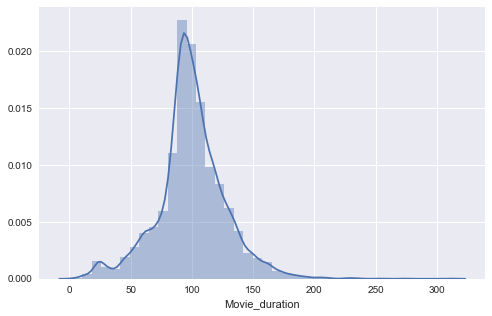

In [93]:
plt.figure(figsize=(8,5))
Movie_duration = data.groupby("title")["Movie_duration"].value_counts()
Movie_duration = pd.DataFrame(Movie_duration)
Movie_duration.rename({"Movie_duration":"duration"},axis = 1,inplace=True)
Movie_duration.reset_index()["Movie_duration"]
sns.distplot(Movie_duration.reset_index()["Movie_duration"],bins = 40)


C:\Users\srinj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


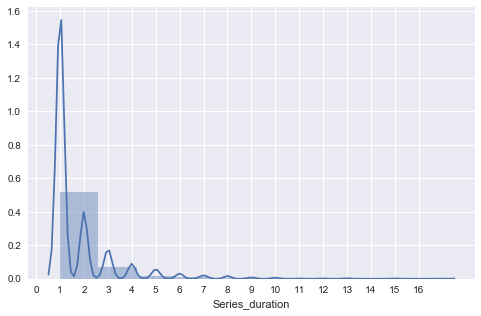

In [94]:
plt.figure(figsize=(8,5))
Series_duration = data.groupby("title")["Series_duration"].value_counts()
Series_duration = pd.DataFrame(Series_duration)
Series_duration.rename({"Series_duration":"duration"},axis = 1,inplace=True)
Series_duration.reset_index()["Series_duration"]
sns.distplot(Series_duration.reset_index()["Series_duration"],bins = 10)
plt.xticks(np.arange(0,17,1))
plt.show()

#### looks like majority of the Movie content is around 75 to 125 min long ! and Series/TV Shows are 1 to 3 seasons long . 

#### adding longer content may or may not be benifiical 

#### below is the data , for Movies and TV shows with highest duration and yet famous.

### Maximum Length Content yet Popular , and their Directors : 

#### this infomation can be helpful in increasing the watch time on Netflix by producing/adding their Movies/series. 

In [95]:

data.groupby("title")["Series_duration","directors"].aggregate({"Series_duration":"max",
                                                                 "directors":"unique"}).sort_values(by="Series_duration",ascending=False).head(20)

,Series_duration,directors
title,,
Grey's Anatomy,17.0,[Unknown]
NCIS,15.0,[Unknown]
Supernatural,15.0,[Phil Sgriccia]
Red vs. Blue,13.0,[Unknown]
Heartland,13.0,[Unknown]
COMEDIANS of the world,13.0,[Unknown]
Criminal Minds,12.0,[Unknown]
Trailer Park Boys,12.0,[Unknown]
Cheers,11.0,[Unknown]


In [96]:

data.groupby("title")["Movie_duration","directors"].aggregate({"Movie_duration":"max",
                                                                 "directors":"unique"}).sort_values(by="Movie_duration",ascending=False).head(20)

,Movie_duration,directors
title,,
Black Mirror: Bandersnatch,312.0,[Unknown]
Headspace: Unwind Your Mind,273.0,[Unknown]
The School of Mischief,253.0,[Houssam El-Din Mustafa]
No Longer kids,237.0,[Samir Al Asfory]
Lock Your Girls In,233.0,[Fouad El-Mohandes]
Raya and Sakina,230.0,[Hussein Kamal]
Once Upon a Time in America,229.0,[Sergio Leone]
Sangam,228.0,[Raj Kapoor]
Lagaan,224.0,[Ashutosh Gowariker]


# TV shows vs Movie data

#### creating seperate datasets for Movies and TV Shows for further analysis : 

In [97]:
TV_shows = data.loc[data["type"]=="TV Show"]

In [98]:
Movies = data.loc[data["type"]=="Movie"]

In [99]:
TV_shows.columns


Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'year_added', 'month_added',
       'Movie_duration', 'Series_duration', 'Content_For'],
      dtype='object')

In [100]:
TV_shows.groupby("year_added")["title"].nunique()

year_added
2008.0      1
2013.0      5
2014.0      5
2015.0     26
2016.0    176
2017.0    349
2018.0    412
2019.0    592
2020.0    595
2021.0    505
Name: title, dtype: int64

In [101]:
Movies.groupby("year_added")["title"].nunique()

year_added
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       6
2014.0      19
2015.0      56
2016.0     253
2017.0     839
2018.0    1237
2019.0    1424
2020.0    1284
2021.0     993
Name: title, dtype: int64

#### plot from above information : 



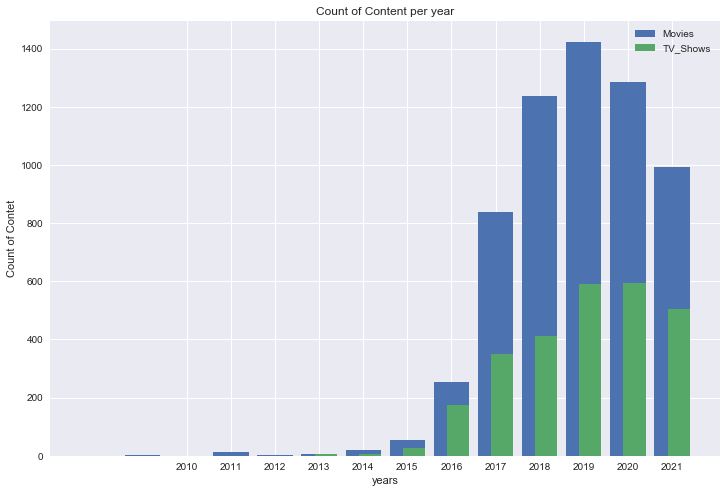

In [102]:
plt.figure(figsize=(12,8))
plt.bar(Movies.groupby("year_added")["title"].nunique().index,
        Movies.groupby("year_added")["title"].nunique())
plt.bar((TV_shows.groupby("year_added")["title"].nunique().index)+0.15,
        TV_shows.groupby("year_added")["title"].nunique(),
        width=0.5 )
plt.xticks(np.arange(2010,2022),rotation = 0)

plt.title("Count of Content per year")
plt.xlabel("years")
plt.ylabel("Count of Contet")



plt.legend(["Movies","TV_Shows"])
plt.show()

#### from above bar plot , we can conclude the focus on Movies and TV shows is equal 

In [103]:
# TV_shows.shape

In [104]:
# Movies.shape

In [105]:
tvcount = TV_shows.groupby("countries")["title"].nunique().sort_values(ascending=False).reset_index()


In [106]:
mcount = Movies.groupby("countries")["title"].nunique().sort_values(ascending=False).reset_index()

In [107]:
tvVSMovies_per_country = tvcount.merge(mcount,on="countries",how = "outer")

In [108]:
tvVSMovies_per_country.rename({"title_x":"TV Shows Count",
                              "title_y":"Movies Counts"},axis = 1,inplace=True)

In [109]:
# tvVSMovies_per_country.head(50)

### Movies Counts - TV Shows Count as per Top Countires : 


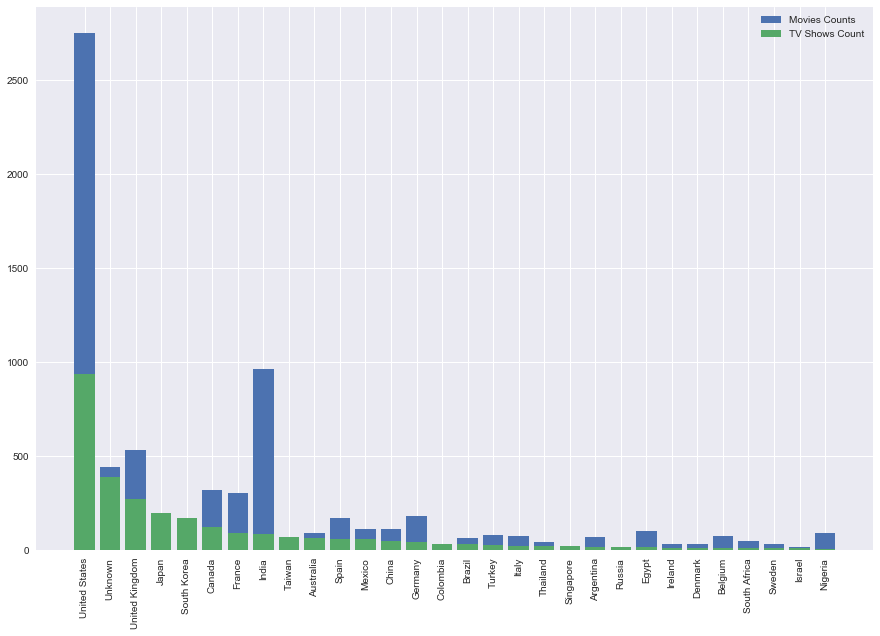

In [110]:
plt.figure(figsize=(15,10))
plt.bar(tvVSMovies_per_country["countries"].head(30),tvVSMovies_per_country["Movies Counts"].head(30))
plt.bar(tvVSMovies_per_country["countries"].head(30),tvVSMovies_per_country["TV Shows Count"].head(30))
plt.xticks(rotation = 90)
plt.legend(["Movies Counts","TV Shows Count"])

plt.show()

#### Japan, South Korea, Taiwan, Combodia , Singapore : has more tv shows content compare to movies ! 

#### We can recommend to focus more on TV shows than Movies in above countires ! 

#### India and USA has more content of Movies compare to TV shows , and for rest of the countires it is equally distributed . 

In [111]:
# data.columns

### best time to launch a content :

In [112]:
data.groupby("month_added")["title"].nunique().sort_values(ascending=False)

month_added
July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: title, dtype: int64

In [113]:
data["date_added"]

0        2021-09-25
1        2021-09-24
2        2021-09-24
3        2021-09-24
4        2021-09-24
5        2021-09-24
6        2021-09-24
7        2021-09-24
8        2021-09-24
9        2021-09-24
10       2021-09-24
11       2021-09-24
12       2021-09-24
13       2021-09-24
14       2021-09-24
15       2021-09-24
16       2021-09-24
17       2021-09-24
18       2021-09-24
19       2021-09-24
20       2021-09-24
21       2021-09-24
22       2021-09-24
23       2021-09-24
24       2021-09-24
25       2021-09-24
26       2021-09-24
27       2021-09-24
28       2021-09-24
29       2021-09-24
            ...    
201961   2020-01-11
201962   2020-01-11
201963   2020-01-11
201964   2020-01-11
201965   2020-01-11
201966   2020-01-11
201967   2019-03-02
201968   2019-03-02
201969   2019-03-02
201970   2019-03-02
201971   2019-03-02
201972   2019-03-02
201973   2019-03-02
201974   2019-03-02
201975   2019-03-02
201976   2019-03-02
201977   2019-03-02
201978   2019-03-02
201979   2019-03-02


In [114]:
data.groupby(data["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False)

date_added
Friday       2498
Thursday     1396
Wednesday    1288
Tuesday      1197
Monday        851
Saturday      816
Sunday        751
Name: title, dtype: int64

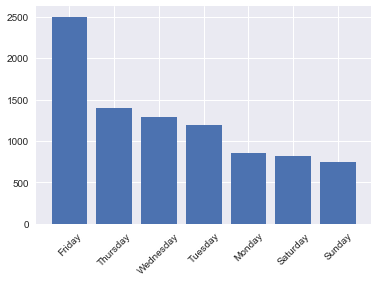

In [115]:
plt.bar(data.groupby(data["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False).index,
        data.groupby(data["date_added"].dt.day_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.show()

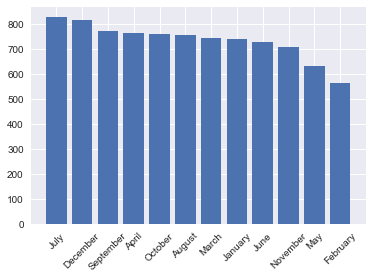

In [116]:
plt.bar(data.groupby(data["date_added"].dt.month_name())["title"].nunique().sort_values(ascending=False).index,
        data.groupby(data["date_added"].dt.month_name())["title"].nunique().sort_values(ascending=False))
plt.xticks(rotation = 45)
plt.show()

#### best time to launch new content is :  July , September and December months on Friday ! 

### Top directors / actors by Movies and TV shows

In [117]:
TV_shows.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)

actors
Unknown                350
Takahiro Sakurai        25
Yuki Kaji               19
Ai Kayano               17
Junichi Suwabe          17
Daisuke Ono             17
Yuichi Nakamura         16
Yoshimasa Hosoya        15
Jun Fukuyama            15
David Attenborough      14
Yoshitsugu Matsuoka     13
Name: title, dtype: int64

In [118]:
TV_shows.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)

directors
Unknown                2446
Ken Burns                 3
Alastair Fothergill       3
Hsu Fu-chun               2
Stan Lathan               2
Name: title, dtype: int64

In [119]:
Movies.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)

actors
Unknown             475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Om Puri              30
Akshay Kumar         30
Amitabh Bachchan     28
Paresh Rawal         28
Julie Tejwani        28
Rupa Bhimani         27
Boman Irani          27
Name: title, dtype: int64

In [120]:
Movies.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)

directors
Unknown                188
Rajiv Chilaka           22
Jan Suter               21
Raúl Campos             19
Suhas Kadav             16
Jay Karas               15
Marcus Raboy            15
Cathy Garcia-Molina     13
Martin Scorsese         12
Jay Chapman             12
Youssef Chahine         12
Name: title, dtype: int64

# Analysing and plotting for Top actors/directors and genres for Top 4 countries

# `For United States`

In [121]:
United_States = data.loc[data["countries"] == "United States"]
United_States.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
0,Dick Johnson Is Dead,Unknown,Kirsten Johnson,United States,Documentaries,Movie,2021-09-25,2020,PG-13,2021.0,September,90.0,NaN,Teens
179,Sankofa,Kofi Ghanaba,Haile Gerima,United States,Dramas,Movie,2021-09-24,1993,TV-MA,2021.0,September,125.0,NaN,Adults


In [122]:
United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
Dramas                      835
Comedies                    680
Documentaries               511
Action & Adventure          404
Independent Movies          390
Children & Family Movies    390
Thrillers                   292
TV Comedies                 258
TV Dramas                   232
Romantic Movies             225
Stand-Up Comedy             216
Kids' TV                    214
Horror Movies               201
Docuseries                  192
Sci-Fi & Fantasy            181
International Movies        166
Music & Musicals            147
Crime TV Shows              145
Reality TV                  123
Sports Movies               113
Name: title, dtype: int64

### top 20 highest watched genres in USA

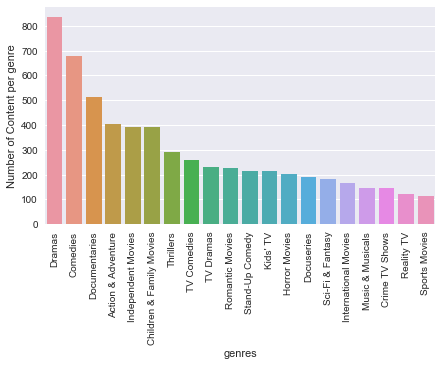

In [123]:
plt.figure(figsize=(7,4))
sns.barplot(x = United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = United_States.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()

### top 10 actors with maximum content online,  in USA

In [124]:
United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

actors
Samuel L. Jackson    22
Tara Strong          22
Fred Tatasciore      21
Adam Sandler         20
Nicolas Cage         19
James Franco         19
Morgan Freeman       18
Seth Rogen           18
Molly Shannon        17
Erin Fitzgerald      16
Name: title, dtype: int64

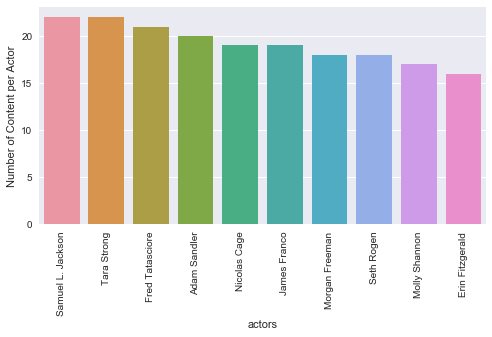

In [125]:
plt.figure(figsize=(8,4))
sns.barplot(x = United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = United_States.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

### top 10 directors with maximum content online,  in USA

In [126]:
United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

directors
Marcus Raboy        15
Jay Karas           15
Jay Chapman         12
Martin Scorsese     12
Steven Spielberg    11
Don Michael Paul    10
Shannon Hartman      9
Ryan Polito          8
Robert Rodriguez     8
Troy Miller          8
Name: title, dtype: int64

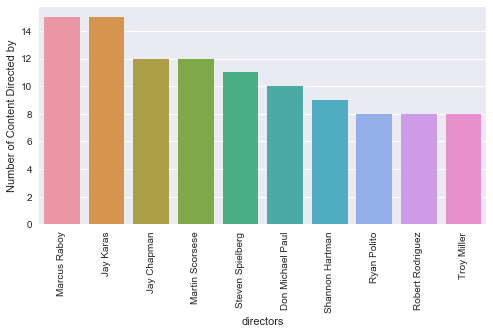

In [127]:
plt.figure(figsize=(8,4))
sns.barplot(x = United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = United_States.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()

# `For India`

In [128]:
India = data.loc[data["countries"] == "India"]
India.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
87,Kota Factory,Mayur More,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
88,Kota Factory,Mayur More,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults


In [129]:
India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
International Movies        864
Dramas                      662
Comedies                    323
Independent Movies          167
Action & Adventure          137
Romantic Movies             120
Music & Musicals             96
Thrillers                    92
International TV Shows       66
Horror Movies                35
TV Dramas                    28
Documentaries                27
Children & Family Movies     26
TV Comedies                  26
Sports Movies                17
Sci-Fi & Fantasy             12
Romantic TV Shows            12
Kids' TV                     12
Classic Movies               11
Docuseries                    9
Name: title, dtype: int64

### Top 20 genres in India

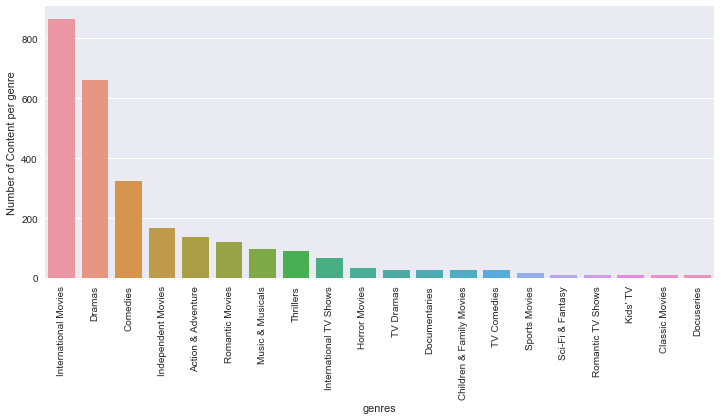

In [130]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = India.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()

### Top 10 actors with highest number of content

In [131]:
India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)

actors
Anupam Kher         40
Unknown             39
Shah Rukh Khan      34
Naseeruddin Shah    31
Om Puri             29
Akshay Kumar        29
Paresh Rawal        28
Amitabh Bachchan    28
Boman Irani         27
Kareena Kapoor      25
Ajay Devgn          21
Name: title, dtype: int64

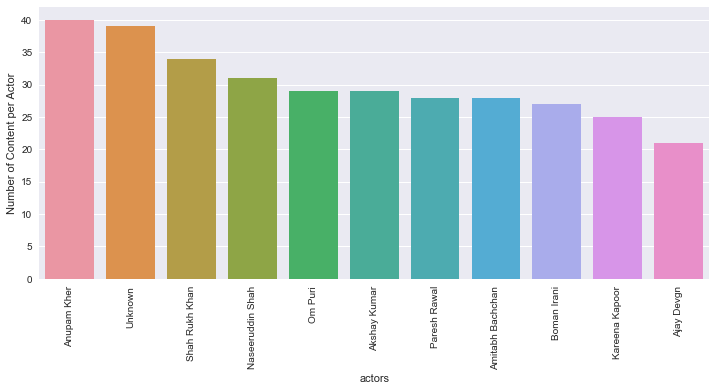

In [132]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11).index , 
            y = India.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

In [133]:
India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:]

directors
David Dhawan          9
Anurag Kashyap        9
Umesh Mehra           8
Dibakar Banerjee      7
Ram Gopal Varma       7
Priyadarshan          7
Ashutosh Gowariker    6
Imtiaz Ali            6
Karan Johar           6
Anees Bazmee          6
Name: title, dtype: int64

### Top 10 directors with highest number of content

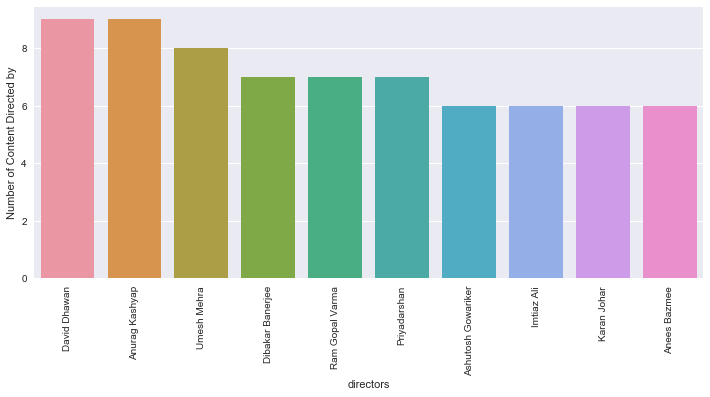

In [134]:
plt.figure(figsize=(12,5))
sns.barplot(x = India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = India.groupby("directors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()

##### Type of Content in India

In [135]:
India.groupby("type")["title"].nunique()

type
Movie      962
TV Show     84
Name: title, dtype: int64

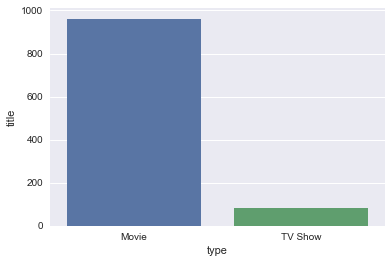

In [136]:
sns.barplot(x = India.groupby("type")["title"].nunique().index , 
           y = India.groupby("type")["title"].nunique())

#### Trend of TV shows in India

In [137]:
IndiaTV_Shows = India.loc[India["type"]=="TV Show"]

In [138]:
IndiaTV_Shows.columns

Index(['title', 'actors', 'directors', 'countries', 'genres', 'type',
       'date_added', 'release_year', 'rating', 'year_added', 'month_added',
       'Movie_duration', 'Series_duration', 'Content_For'],
      dtype='object')

In [146]:
IndiaTV_Shows = IndiaTV_Shows[["title","year_added"]].sort_values(by="year_added")

In [147]:
IndiaTV_Shows

,title,year_added
year_added,,
2017.0,14,1
2018.0,17,1
2019.0,18,1
2020.0,18,1
2021.0,17,1


In [148]:
IndiaTV_Shows=  IndiaTV_Shows.groupby("year_added").nunique()
IndiaTV_Shows

,title,year_added
year_added,,
1,3,1


###### looks like there were no TV shows on Netflix before 2017 .  After 2017 it was drastically increasing till 2020, and after that trend got slightly decreased , probably because of pandemic situation. 

Since the overall trendline of TV shows is increasing in India ! Netflix should focus also on producing more TV series with movies ! 

Since Most Popular Genre in India is International Movies, it it also suggested to add some international TV shows from USA and UK in NetflixIndia. 


Here are some recommended celebrities for TV shows : 

In [149]:
IndiaTVShows = India.loc[India["type"]=="TV Show"]
IndiaTVShows.head()

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
87,Kota Factory,Mayur More,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
88,Kota Factory,Mayur More,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
89,Kota Factory,Mayur More,Unknown,India,TV Comedies,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
90,Kota Factory,Jitendra Kumar,Unknown,India,International TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults
91,Kota Factory,Jitendra Kumar,Unknown,India,Romantic TV Shows,TV Show,2021-09-24,2021,TV-MA,2021.0,September,NaN,2.0,Adults


##### best directors for Indian TV shows

In [150]:
IndiaTVShows.groupby("directors")["title"].nunique().sort_values(ascending=False)[1:]

directors
Gautham Vasudev Menon        2
Vikramaditya Motwane         1
Karthik Subbaraj             1
Arvind Swamy                 1
B. V. Nandini Reddy          1
Bejoy Nambiar                1
Bumpy                        1
Caroline Sá                  1
Chico Pereira                1
Deepti Kakkar                1
Dheeraj Berry                1
Elaine McMillion Sheldon     1
Fahad Mustafa                1
Hikaru Toda                  1
Karthik Narain               1
Moyoung Jin                  1
Vijay Roche                  1
Nag Ashwin                   1
Nizar Shafi                  1
Patrick Graham               1
Priyadarshan                 1
Rathindran R Prasad          1
Sankalp Reddy                1
Sarjun                       1
Soumendra Padhi              1
Sudha Kongara                1
Tharun Bhascker Dhaassyam    1
Vasanth Sai                  1
Vetri Maaran                 1
Vignesh Shivan               1
Anurag Kashyap               1
Name: title, dtype: int64

In [151]:
IndiaTVShows.groupby("actors")["title"].nunique().sort_values(ascending=False).head(30)

actors
Unknown                  19
Rajesh Kava               3
Nishka Raheja             3
Mahesh Manjrekar          2
Sonal Kaushal             2
Revathi Pillai            2
Jigna Bhardwaj            2
Shanoor Mirza             2
Reena Aggarwal            2
Prakash Raj               2
Anjali                    2
Jitendra Joshi            2
Julie Tejwani             2
Danish Husain             2
Shreya Mehta              2
Chandan Anand             2
Rasika Dugal              2
Aranya Kaur               2
Siddhant Karnick          2
Rajesh Tailang            2
Manish Chaudhary          2
Radhika Apte              2
Ulka Gupta                2
Rupa Bhimani              2
Gautham Vasudev Menon     2
Mona Ambegaonkar          2
Sabina Malik              2
Aahana Kumra              2
Gagan Arora               2
Ahsaas Channa             2
Name: title, dtype: int64

In [152]:
# Recommended Genres for Indian TV shows

In [153]:
IndiaTVShows.groupby("genres")["title"].nunique().sort_values(ascending=False).head(10)

genres
International TV Shows    66
TV Dramas                 28
TV Comedies               26
Romantic TV Shows         12
Kids' TV                  12
Crime TV Shows             9
Docuseries                 9
TV Horror                  7
Reality TV                 6
TV Action & Adventure      5
Name: title, dtype: int64

#### all tv shows in India

In [154]:
India_TV_Shows  = India.loc[India["type"]=="TV Show"]
India_TV_Shows.groupby("title")["title"].nunique()

title
21 Sarfarosh: Saragarhi 1897                     1
7 (Seven)                                        1
Agent Raghav                                     1
Akbar Birbal                                     1
Alma Matters                                     1
Anjaan: Rural Myths                              1
Anjaan: Special Crimes Unit                      1
Bad Boy Billionaires: India                      1
Badalte Rishton Ki Dastaan                       1
Bard of Blood                                    1
Betaal                                           1
Bh Se Bhade                                      1
Bhaag Beanie Bhaag                               1
Bhaage Re Mann                                   1
Bombay Begums                                    1
Chhota Bheem                                     1
ChuChu TV Nursery Rhymes & Kids Songs (Hindi)    1
Classic Legends                                  1
College Romance                                  1
Cricket Fever: Mumbai Ind

# `For UK`

In [155]:
UK = data.loc[data["countries"] == "United Kingdom"]



In [156]:
UK.head(2)

,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
188,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,Dramas,Movie,2021-09-24,1993,TV-MA,2021.0,September,125.0,NaN,Adults
189,Sankofa,Kofi Ghanaba,Haile Gerima,United Kingdom,Independent Movies,Movie,2021-09-24,1993,TV-MA,2021.0,September,125.0,NaN,Adults


In [157]:
UK.shape

(12945, 14)

### Top 20 genres in UK

In [158]:
UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)

genres
British TV Shows            225
Dramas                      196
International Movies        168
International TV Shows      128
Documentaries               127
Comedies                     91
Docuseries                   89
Action & Adventure           84
Independent Movies           74
Thrillers                    61
Crime TV Shows               48
Children & Family Movies     46
TV Comedies                  44
Kids' TV                     43
Romantic Movies              38
Music & Musicals             36
TV Dramas                    36
Sci-Fi & Fantasy             35
Reality TV                   35
Horror Movies                28
Name: title, dtype: int64

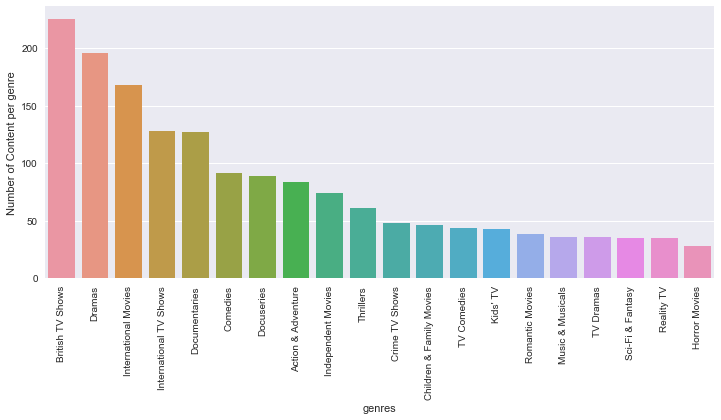

In [159]:
plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = UK.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()


### Top 10 Actors in UK

In [160]:
UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]


actors
David Attenborough      17
John Cleese             16
Michael Palin           14
Eric Idle               12
Terry Jones             12
Graham Chapman          11
Terry Gilliam           11
Helena Bonham Carter     9
Judi Dench               9
Samuel West              9
Name: title, dtype: int64

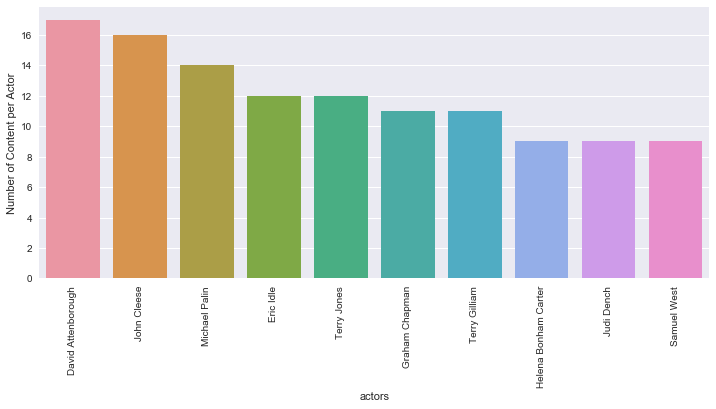

In [161]:
plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = UK.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()

### Top 5 directors in UK

In [162]:
UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:]


directors
Edward Cotterill       4
Alastair Fothergill    4
Tom Hooper             3
Jerry Rothwell         3
Name: title, dtype: int64

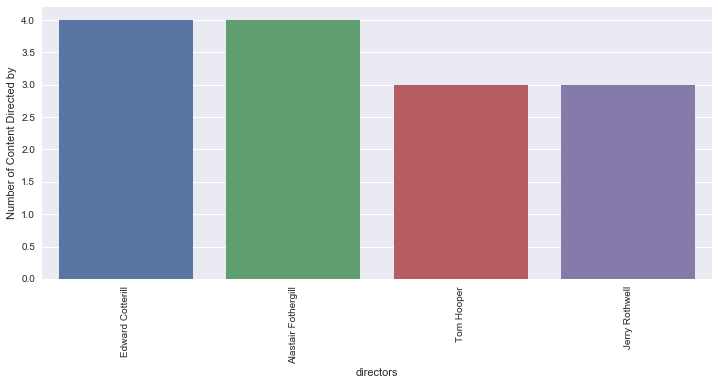

In [163]:

plt.figure(figsize=(12,5))
sns.barplot(x = UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:].index ,
            y = UK.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()




##### TV shows in UK

In [164]:
UK = data.loc[data["countries"] == "United Kingdom"]
UK.shape

(12945, 14)

In [165]:
UK.groupby("type")["title"].nunique()

type
Movie      532
TV Show    272
Name: title, dtype: int64

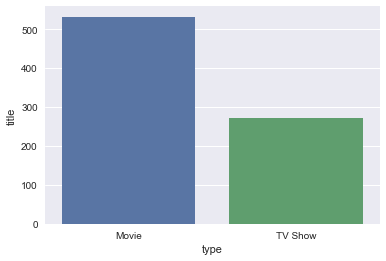

In [166]:
sns.barplot(x = UK.groupby("type")["title"].nunique().index , 
           y = UK.groupby("type")["title"].nunique())

In [167]:
UK_TV_shows = UK.loc[UK["type"]=="TV Show"]


In [169]:
UK_TV_shows = UK_TV_shows[["title","year_added"]].sort_values(by="year_added")

In [171]:
UK_TV_shows=  UK_TV_shows.groupby("year_added").nunique()
UK_TV_shows

,title,year_added
year_added,,
1,8,1


##### Trend line for TV Shows in UK

In [173]:
UK_TV_shows = UK.loc[UK["type"]=="TV Show"]
UK_TV_shows.shape

(4385, 14)

In [176]:
UK_TV_shows.groupby("directors")["title"].nunique().sort_values(ascending=False)[1:]

directors
Alastair Fothergill    3
Tony Collingwood       1
Ally Pankiw            1
Andy Devonshire        1
Damien Chazelle        1
Dan Lucchesi           1
Daniel Kontur          1
Ellena Wood            1
Gordon Anderson        1
Greg Tiernan           1
Houda Benyamina        1
Ian Barber             1
Jakob Schuh            1
Jakob Verbruggen       1
James Hawes            1
Jani Lachauer          1
Jesse Vile             1
Juliet May             1
Laïla Marrakchi        1
Mark Lewis             1
Mark Tonderai          1
Michael Cumming        1
Michael Samuels        1
Noam Murro             1
Philippa Lowthorpe     1
Rachel Bell            1
Simon Frederick        1
Toby Haynes            1
Alan Poul              1
Name: title, dtype: int64

In [177]:
UK_TV_shows.groupby("actors")["title"].nunique().sort_values(ascending=False).head(30)[1:]

actors
David Attenborough    13
Eric Idle              5
Michael Palin          5
John Cleese            5
Terry Jones            5
Graham Chapman         5
Olivia Colman          4
Harriet Walter         4
Greg Davies            4
Kate Harbour           4
Brendan Coyle          4
Rory Kinnear           4
Teresa Gallagher       4
Terry Gilliam          4
David Dawson           3
Lee Ingleby            3
David Holt             3
Danny Sapani           3
Daniel Rigby           3
Nadiya Hussain         3
Paul Hollywood         3
Hannah John-Kamen      3
Ricky Gervais          3
David Tennant          3
Henry Lloyd-Hughes     3
Nigel Lindsay          3
Hugh Bonneville        3
Siobhan Finneran       3
Andy Nyman             3
Name: title, dtype: int64

In [178]:
UK_TV_shows.groupby("genres")["title"].nunique().sort_values(ascending=False).head(10)

genres
British TV Shows          225
International TV Shows    128
Docuseries                 89
Crime TV Shows             48
TV Comedies                44
Kids' TV                   43
TV Dramas                  36
Reality TV                 35
Science & Nature TV        27
Romantic TV Shows          11
Name: title, dtype: int64

# `For canada`

In [179]:
Canada = data.loc[data["countries"] == "Canada"]
Canada.head()


,title,actors,directors,countries,genres,type,date_added,release_year,rating,year_added,month_added,Movie_duration,Series_duration,Content_For
937,Birth of the Dragon,Billy Magnussen,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,2021.0,September,96.0,NaN,Teens
938,Birth of the Dragon,Billy Magnussen,George Nolfi,Canada,Dramas,Movie,2021-09-16,2017,PG-13,2021.0,September,96.0,NaN,Teens
943,Birth of the Dragon,Ron Yuan,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,2021.0,September,96.0,NaN,Teens
944,Birth of the Dragon,Ron Yuan,George Nolfi,Canada,Dramas,Movie,2021-09-16,2017,PG-13,2021.0,September,96.0,NaN,Teens
949,Birth of the Dragon,Qu Jingjing,George Nolfi,Canada,Action & Adventure,Movie,2021-09-16,2017,PG-13,2021.0,September,96.0,NaN,Teens


In [180]:
Canada.shape


(7915, 14)

### top 20 genres in Canada 

In [181]:

Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20)


genres
Comedies                    94
Dramas                      82
Children & Family Movies    80
Kids' TV                    61
International Movies        60
Thrillers                   49
Independent Movies          44
Action & Adventure          44
Documentaries               42
Horror Movies               36
TV Dramas                   32
TV Comedies                 30
Sci-Fi & Fantasy            28
Romantic Movies             25
International TV Shows      25
Crime TV Shows              15
Music & Musicals            14
Sports Movies               13
TV Action & Adventure       12
Docuseries                  11
Name: title, dtype: int64

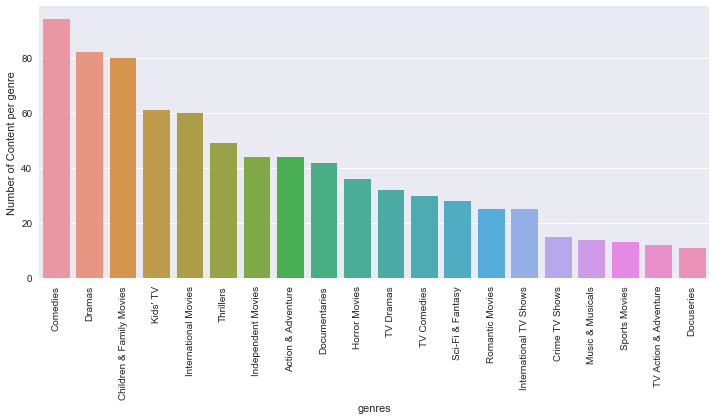

In [182]:


plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20).index ,
            y = Canada.groupby("genres")["title"].nunique().sort_values(ascending =False).head(20))
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per genre")

plt.show()





### Top 10 Actors in Canada

In [183]:



Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:]




actors
John Paul Tremblay    14
Robb Wells            14
Vincent Tong          12
John Dunsworth        12
Ashleigh Ball         12
Andrea Libman         11
Michela Luci          11
Mike Smith            10
Tara Strong            9
Colm Feore             9
Name: title, dtype: int64

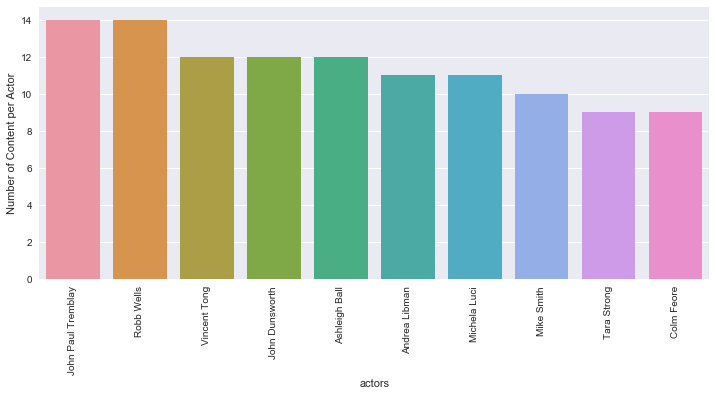

In [184]:
plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:].index ,
            y = Canada.groupby("actors")["title"].nunique().sort_values(ascending=False).head(11)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content per Actor")
plt.show()






### Top 10 directors in Canada


In [185]:


Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:]


directors
Justin G. Dyck        8
Robert Vince          5
John Paul Tremblay    5
Mike Clattenburg      5
Name: title, dtype: int64

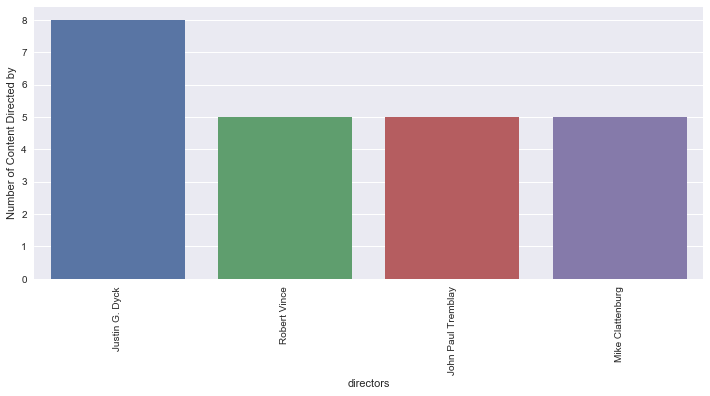

In [186]:

plt.figure(figsize=(12,5))
sns.barplot(x = Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:].index ,
            y = Canada.groupby("directors")["title"].nunique().sort_values(ascending=False).head(5)[1:])
plt.xticks(rotation = 90)
plt.ylabel("Number of Content Directed by")


plt.show()




# Apart from Highest Subscribers Countries : 
## people from other countries can be potentials subscribers : 
### Those countries are : 

Russia                
China                 
Germany               
South Korea
Mexico                
Singapore             
Poland                
United Arab Emirates  
        



## recommended actors/directors and genres in countires listed above : 

In [187]:
potential_subscribers_from = ["Russia","China","Germany","South Korea", "Mexico","Singapore","Poland","United Arab Emirates"]

In [188]:
for countries in potential_subscribers_from:
    print("===============================================")
    print("Country: ",countries)
    print("Recommended Names # Number of movies they have done")
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("actors")["title"].nunique().sort_values(ascending = False).head(10))
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("directors")["title"].nunique().sort_values(ascending = False).head(6)[1:])
    print("-----------------------------------------------")
    print(data[data["countries"]==countries].groupby("genres")["title"].nunique().sort_values(ascending = False).head(10))
    print()

Country:  Russia
Recommended Names # Number of movies they have done
-----------------------------------------------
actors
Unknown                  5
Alexander Petrov         3
Paulina Andreeva         3
Erica Schroeder          2
Konstantin Khabenskiy    2
Dmitry Shevchenko        2
Fillip Gorenshtein       2
Eldar Kalimulin          2
Kirill Käro              2
Danila Kozlovsky         2
Name: title, dtype: int64
-----------------------------------------------
directors
Robert Rodriguez     1
Pavel Parkhomenko    1
Pavel Kostomarov     1
Maya Zinshtein       1
Levan Gabriadze      1
Name: title, dtype: int64
-----------------------------------------------
genres
International TV Shows      10
TV Dramas                    7
Kids' TV                     6
Crime TV Shows               6
International Movies         6
Action & Adventure           4
Dramas                       3
Sci-Fi & Fantasy             2
Documentaries                2
Children & Family Movies     2
Name: title, dty

## Top genres per top countires : 

In [189]:
for cntry in top_20_countires[:11]:
    print()
    print("<<",cntry,">>")
    print(data.groupby("countries")["genres"].get_group(cntry).value_counts().head().index)
    print()
    print()


<< United States >>
Index(['Comedies', 'Dramas', 'Children & Family Movies', 'Action & Adventure',
       'Independent Movies'],
      dtype='object')



<< India >>
Index(['International Movies', 'Dramas', 'Comedies', 'Independent Movies',
       'Action & Adventure'],
      dtype='object')



<< Unknown >>
Index(['International TV Shows', 'International Movies', 'Dramas', 'TV Dramas',
       'Comedies'],
      dtype='object')



<< United Kingdom >>
Index(['Dramas', 'British TV Shows', 'International Movies', 'Comedies',
       'International TV Shows'],
      dtype='object')



<< Canada >>
Index(['Comedies', 'Children & Family Movies', 'Dramas', 'Kids' TV',
       'International Movies'],
      dtype='object')



<< France >>
Index(['International Movies', 'Dramas', 'Independent Movies', 'Comedies',
       'International TV Shows'],
      dtype='object')



<< Japan >>
Index(['International TV Shows', 'Anime Series', 'Action & Adventure',
       'Anime Features', 'International Mo

# year wise best top 5 genres :

In [190]:
years = np.arange(2010,2022,1)

In [191]:
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [192]:
data.groupby("year_added").get_group(2021).groupby("genres")["title"].nunique().sort_values(ascending = False).head()

genres
Dramas                    412
International Movies      408
Comedies                  299
International TV Shows    229
Action & Adventure        196
Name: title, dtype: int64

In [193]:
for yr in years :
    print()
    print(yr)
    print(data.groupby("year_added").get_group(yr).groupby("genres")["title"].nunique().sort_values(ascending = False).head())
    print("=======================")


2010
genres
Horror Movies    1
Cult Movies      1
Name: title, dtype: int64

2011
genres
Dramas                  13
Sports Movies            2
Thrillers                1
International Movies     1
Faith & Spirituality     1
Name: title, dtype: int64

2012
genres
Comedies                    2
Documentaries               1
Children & Family Movies    1
Name: title, dtype: int64

2013
genres
TV Dramas                   4
Stand-Up Comedy             4
Crime TV Shows              2
Children & Family Movies    2
Teen TV Shows               1
Name: title, dtype: int64

2014
genres
Documentaries               8
Stand-Up Comedy             4
Children & Family Movies    4
TV Dramas                   3
TV Comedies                 3
Name: title, dtype: int64

2015
genres
Documentaries               13
Stand-Up Comedy             13
Comedies                    12
Dramas                      12
Children & Family Movies    11
Name: title, dtype: int64

2016
genres
International TV Shows    86
Intern